## Project
You are working as a wealth manager at a small firm where you have clients seeking advice on how to invest their money. A young client wants to invest a large amount of their savings in a portfolio of stocks, but they are unsure of what stocks to invest in and at what amounts.

In this capstone project, you will create a presentation that showcases a portfolio of stocks that you recommend your client invest in, and provide the weights at which they should invest in each stock depending on their risk preference.

## Import/Download the Data

The financial data you use in this project is up to you. You can access financial data using one of the APIs accessed through the pandas-datareader package or from websites such as Yahoo Finance. Make sure to find data for at least, but not limited to, four (4) stocks to include in your analysis.

Load the data into a pandas DataFrame so you can easily view and manipulate the data.

## Calculate Financial Statistics

Calculate some of the financial statistics you have learned about to gain insights into the stocks and how they relate to each other. What are the returns of the stocks over different time periods? How risky are each of the stocks when compared to each other? Do the returns of the stocks correlate with each other, or are they diversified?

## Optimized Portfolio

Perform a mean-variance portfolio optimization that shows the efficient frontier for the group of stocks you have selected. If the investor is less risky, how should she allocate her funds across the portfolio? If she is more risky, how should she allocate her funds? Indicate multiple investment options at different risk levels and specify the returns.

## Create Your Presentation

We want to see:

information about the stocks you utilized (industry, sector, background, news)
the key financial statistics about the stocks and how you interpret them
a few different portfolio options with the stock weights and why the investor would select that portfolio
an overall conclusion to the client about your recommendations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime
from pandas_datareader import data as pdr
#we  will need it for intervals etc
import yfinance as yf
yf.pdr_override()

In [2]:
import cvxopt as opt
from cvxopt import blas, solvers

def return_portfolios(expected_returns, cov_matrix):
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    selected = (expected_returns.axes)[0]
    
    num_assets = len(selected) 
    num_portfolios = 5000
    
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
    for counter,symbol in enumerate(selected):
        portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    
    column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
    df = df[column_order]
   
    return df
  
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.to_numpy())

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks


In [3]:
#Create a Dataframe to store the adjusted close price of the stocks
#interval = '1mo' to get Adj Close price per month (intead of deafult, per day)
df2 = pd.DataFrame()

#['AAPL','TEAM','FVRR','Z','CVS','VZ','T','WMT','AG','LOGI','VZ','T','TMUS','TSLA','NFLX']
ticker_list2=['AAPL','TEAM','FVRR','Z','CVS','WMT','AG','AUY']

#what interval?
interval = "3mo"
for ticker in ticker_list2:
    print(ticker)
    df2[ticker]= pdr.get_data_yahoo(ticker, start= '2018-12-31', end= '2020-10-1', interval = interval)['Adj Close'] 

#Get tickers
my_stocks2 = df2

#remove Date from the index, pass it into a separated column
#my_stocks2.reset_index(inplace=True,drop=False)


AAPL
[*********************100%***********************]  1 of 1 completed
TEAM
[*********************100%***********************]  1 of 1 completed
FVRR
[*********************100%***********************]  1 of 1 completed
Z
[*********************100%***********************]  1 of 1 completed
CVS
[*********************100%***********************]  1 of 1 completed
WMT
[*********************100%***********************]  1 of 1 completed
AG
[*********************100%***********************]  1 of 1 completed
AUY
[*********************100%***********************]  1 of 1 completed


In [4]:
#print(my_stocks2.resample('M').ffill())
#print(my_stocks2)
#Drop the rows where at least one element is missing
my_stocks2_without_na = my_stocks2.dropna()
print(my_stocks2_without_na)

                  AAPL        TEAM        FVRR           Z        CVS  \
Date                                                                    
2019-06-01   51.388077  134.509995   23.389999   34.430000  58.079212   
2019-09-01   66.042168  127.110001   23.010000   39.150002  72.403404   
2019-12-01   67.754868  144.960007   31.480000   55.810001  57.357052   
2020-03-01   78.991470  185.300003   65.120003   57.990002  63.979092   
2020-06-01  128.585907  191.759995  120.650002   85.760002  61.120014   
2020-09-01  115.610542  181.789993  138.979996  101.589996  57.908669   

                   WMT     AG       AUY  
Date                                     
2019-06-01  111.741020  10.88  3.544856  
2019-09-01  117.037827  10.76  3.522470  
2019-12-01  105.824448   7.54  3.769767  
2020-03-01  122.469063  10.01  5.303291  
2020-06-01  138.281509  12.45  6.161372  
2020-09-01  139.910004   9.52  5.662000  


In [5]:
#we do not want to select the Date column
#selected = list(my_stocks2_without_na.columns[1:])
#print(selected)
#returns_quarterly = my_stocks2_without_na[selected].pct_change()
#show the quarterly returns 
returns_quarterly = my_stocks2_without_na.pct_change()
print(returns_quarterly)

#Find the expected returns 
expected_returns = returns_quarterly.mean()
print(expected_returns)
#Find the covariance 
cov_quarterly = returns_quarterly.cov()
print(cov_quarterly)

                AAPL      TEAM      FVRR         Z       CVS       WMT  \
Date                                                                     
2019-06-01       NaN       NaN       NaN       NaN       NaN       NaN   
2019-09-01  0.285165 -0.055014 -0.016246  0.137090  0.246632  0.047403   
2019-12-01  0.025933  0.140430  0.368101  0.425543 -0.207813 -0.095810   
2020-03-01  0.165842  0.278284  1.068615  0.039061  0.115453  0.157285   
2020-06-01  0.627845  0.034862  0.852733  0.478876 -0.044688  0.129114   
2020-09-01 -0.100908 -0.051992  0.151927  0.184585 -0.052542  0.011777   

                  AG       AUY  
Date                            
2019-06-01       NaN       NaN  
2019-09-01 -0.011029 -0.006315  
2019-12-01 -0.299257  0.070205  
2020-03-01  0.327586  0.406795  
2020-06-01  0.243756  0.161802  
2020-09-01 -0.235341 -0.081049  
AAPL    0.200776
TEAM    0.069314
FVRR    0.485026
Z       0.253031
CVS     0.011409
WMT     0.049954
AG      0.005143
AUY     0.110288
dtype: 

     pcost       dcost       gap    pres   dres
 0: -3.2537e-01 -1.4768e+00  1e+01  3e+00  4e+00
 1: -1.9147e-01 -1.2119e+00  1e+00  2e-15  8e-16
 2: -2.4489e-01 -4.8486e-01  2e-01  2e-16  2e-16
 3: -4.5387e-01 -5.2024e-01  7e-02  6e-16  3e-16
 4: -4.7395e-01 -4.7484e-01  9e-04  1e-16  2e-16
 5: -4.7438e-01 -4.7438e-01  9e-06  8e-20  2e-16
 6: -4.7438e-01 -4.7438e-01  9e-08  8e-22  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.2460e-01 -1.4759e+00  1e+01  3e+00  4e+00
 1: -1.9122e-01 -1.2111e+00  1e+00  2e-15  5e-16
 2: -2.4444e-01 -4.8395e-01  2e-01  6e-16  3e-16
 3: -4.5286e-01 -5.1888e-01  7e-02  2e-16  2e-16
 4: -4.7265e-01 -4.7354e-01  9e-04  1e-16  3e-16
 5: -4.7308e-01 -4.7309e-01  9e-06  2e-16  2e-16
 6: -4.7308e-01 -4.7308e-01  9e-08  4e-22  1e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.2375e-01 -1.4747e+00  1e+01  3e+00  4e+00
 1: -1.9092e-01 -1.2102e+00  1e+00  4e-16  8e-16
 2: -2.4393e-01 -4.8293e

 4: -1.1609e-01 -1.2004e-01  4e-03  1e-16  1e-16
 5: -1.1705e-01 -1.1718e-01  1e-04  6e-17  1e-16
 6: -1.1714e-01 -1.1714e-01  2e-06  1e-16  2e-16
 7: -1.1714e-01 -1.1714e-01  2e-08  6e-17  8e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0144e-01 -1.1763e+00  1e+01  3e+00  4e+00
 1: -2.6895e-02 -9.1334e-01  9e-01  1e-15  7e-16
 2: -6.2602e-02 -1.7432e-01  1e-01  4e-16  4e-16
 3: -9.4792e-02 -1.1288e-01  2e-02  6e-17  2e-16
 4: -1.0780e-01 -1.1226e-01  4e-03  1e-16  1e-16
 5: -1.0894e-01 -1.0912e-01  2e-04  1e-16  1e-16
 6: -1.0900e-01 -1.0902e-01  2e-05  1e-16  1e-16
 7: -1.0901e-01 -1.0901e-01  2e-06  6e-17  2e-16
 8: -1.0901e-01 -1.0901e-01  5e-08  2e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.8287e-02 -1.1676e+00  1e+01  3e+00  4e+00
 1: -2.2143e-02 -8.9862e-01  9e-01  6e-16  5e-16
 2: -5.8051e-02 -1.6138e-01  1e-01  3e-16  7e-16
 3: -8.9044e-02 -1.0582e-01  2e-02  8e-17  2e-16
 4: -1.0001e-01 -1.0492

 4:  2.5869e+00  2.5698e+00  3e-02  6e-04  7e-04
 5:  2.5713e+00  2.5710e+00  4e-04  6e-06  7e-06
 6:  2.5711e+00  2.5711e+00  4e-06  6e-08  7e-08
 7:  2.5711e+00  2.5711e+00  4e-08  6e-10  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.7939e-02 -1.0148e+00  1e+01  3e+00  4e+00
 1: -5.1322e-02 -4.8575e-01  2e+00  4e-01  5e-01
 2:  9.1998e-02  4.7395e-01  1e+00  2e-01  3e-01
 3:  2.9481e+00  2.8037e+00  1e+00  4e-02  5e-02
 4:  2.9087e+00  2.8971e+00  3e-02  6e-04  7e-04
 5:  2.8987e+00  2.8984e+00  4e-04  6e-06  7e-06
 6:  2.8985e+00  2.8985e+00  5e-06  6e-08  7e-08
 7:  2.8985e+00  2.8985e+00  5e-08  6e-10  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.8471e-02 -1.0150e+00  1e+01  3e+00  4e+00
 1: -5.3382e-02 -4.8273e-01  2e+00  4e-01  5e-01
 2:  8.0992e-02  4.8815e-01  1e+00  2e-01  3e-01
 3:  3.1434e+00  3.1624e+00  1e+00  5e-02  6e-02
 4:  3.2688e+00  3.2640e+00  2e-02  6e-04  8e-04
 5:  3.2660e+00  3.2658

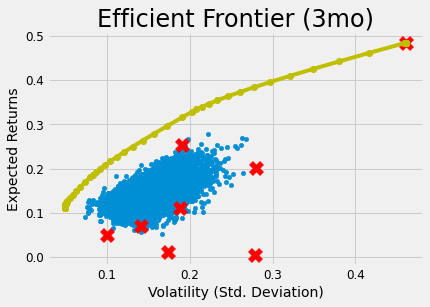

In [6]:
#Find a set of random portfolios
random_portfolios = return_portfolios(expected_returns,cov_quarterly)
# Plot the set of random portfolios
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)


#Calculate the set of portfolios on the EF
weights, returns, risks = optimal_portfolio(returns_quarterly[1:])
#Plot the set of portfolios on the EF
plt.plot(risks, returns, 'y-o')

plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier ('+ interval+')', fontsize=24)

#Compare the set of portfolios to the EF  
try:
    single_asset_std=np.sqrt(np.diagonal(cov_quarterly))
    plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)
except:
    pass
plt.show()



In [7]:
returns_tolerance = np.array([0.2, 0.25])
volatility_tolerance = np.array([0.15, 0.2])

df_lower_volatility = random_portfolios[(random_portfolios.Returns > returns_tolerance[0]) & (random_portfolios.Volatility < volatility_tolerance[0])]
df_higher_returns = random_portfolios[(random_portfolios.Returns > returns_tolerance[1]) & (random_portfolios.Volatility < volatility_tolerance[1])]
print('Lower volatility: ')
print(df_lower_volatility)
print('Higher returns: ')
print(df_higher_returns)

Lower volatility: 
      Returns  Volatility  AAPL Weight  TEAM Weight  FVRR Weight  Z Weight  \
332  0.208446    0.141292     0.069398     0.068251     0.195207   0.32763   

     CVS Weight  WMT Weight  AG Weight  AUY Weight  
332    0.102697     0.20285   0.027101    0.006866  
Higher returns: 
       Returns  Volatility  AAPL Weight  TEAM Weight  FVRR Weight  Z Weight  \
1826  0.267685    0.197773     0.124035     0.064511     0.326518  0.296437   
3870  0.251909    0.194509     0.205600     0.184073     0.265714  0.268012   

      CVS Weight  WMT Weight  AG Weight  AUY Weight  
1826    0.099854    0.042016   0.032791    0.013836  
3870    0.030023    0.005630   0.037683    0.003265  


In [8]:
print('Lower volatility')
print(random_portfolios.iloc[414])
print('')
print('Higher returns')
high= random_portfolios.iloc[1616]

print(high)

Lower volatility
Returns        0.223442
Volatility     0.179211
AAPL Weight    0.141896
TEAM Weight    0.120837
FVRR Weight    0.205532
Z Weight       0.245849
CVS Weight     0.029925
WMT Weight     0.023530
AG Weight      0.023491
AUY Weight     0.208940
Name: 414, dtype: float64

Higher returns
Returns        0.080032
Volatility     0.155588
AAPL Weight    0.078042
TEAM Weight    0.135514
FVRR Weight    0.019242
Z Weight       0.011210
CVS Weight     0.062751
WMT Weight     0.234742
AG Weight      0.192198
AUY Weight     0.266300
Name: 1616, dtype: float64


In [9]:
#lets say we will use the strategy with the most high risks, we take the high[2:]  weights
test =dict(zip(my_stocks2.columns.values,high[2:]))
print(test)

{'AAPL': 0.07804219233272965, 'TEAM': 0.13551363457847573, 'FVRR': 0.01924193436631424, 'Z': 0.011210296810316293, 'CVS': 0.0627514293436699, 'WMT': 0.23474233231267166, 'AG': 0.19219831090482217, 'AUY': 0.2662998693510003}


In [10]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(my_stocks2)
weights = test
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 12000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'AAPL': 8, 'TEAM': 9, 'FVRR': 2, 'Z': 1, 'CVS': 13, 'WMT': 20, 'AG': 243, 'AUY': 564}
Funds remaining: $1.72
